In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from os.path import join
from scipy.interpolate import UnivariateSpline
from scipy.signal import savgol_filter

# Apply Savitzky–Golay filter with a window length of 11 and a polynomial order of 2



In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

def plot_single(x, ys, title, xlabel, ylabel, **kwargs):
    plt.figure(figsize=(12, 7.5))
    for (y,yl) in ys:
        plt.plot(x, y, linestyle='-', label=yl)
    plt.title(title)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [3]:
def from_csv(path):
    df = pd.read_csv(path)
    return {column:df[column].to_numpy().astype(np.float32) for column in df.columns}

def get_latest_plot_data():
    outer_dir = sorted(filter(lambda f: os.path.isdir(f), os.listdir('exp_local/')))[-1]
    inner_dir = sorted(filter(lambda f: os.path.isdir(f), os.listdir(outer_dir)))[-1]
    return f"{inner_dir}/eval.csv"

In [4]:
def get_latest_dir(neg_offset=-1):
    base_path = 'exp_local'
    format_inner = lambda f: join(base_path, f)
    outer_dir = sorted(filter(lambda f: os.path.isdir(format_inner(f)) and f.endswith('_tdmpc'), 
                            os.listdir(base_path)))[-1]
    outer_dir = format_inner(outer_dir)
    format_outer = lambda f: join(outer_dir, f)
    inner_dir = sorted(filter(lambda f: os.path.isdir(format_outer(f)),
                            os.listdir(outer_dir)))[neg_offset]
    return format_outer(inner_dir)

def get_latest_plot_data(csv_file, neg_offset=-1):
    dir = get_latest_dir(neg_offset)
    return join(dir, csv_file)

def get_all_loss_curves(neg_offset=-1):
    dir = get_latest_dir(neg_offset)
    loss_curve_files = sorted(filter(
        lambda f: os.path.isfile(os.path.join(dir, f))
        and f.startswith('loss_curve'),
        os.listdir(dir)))
    loss_curves = [np.load(os.path.join(dir, f)) for f in loss_curve_files]
    return loss_curves

In [6]:
path = get_latest_plot_data('train.csv')
print(path)
d = from_csv(path)
plot_single(d['step'], 
            [(d['critic_loss'],'critic_loss')],
            "Train Critic Loss",
            "steps",
            "Loss")

In [7]:
path = get_latest_plot_data('train.csv')
print(path)
d = from_csv(path)
plot_single(d['step'], 
            [(-d['actor_logprob'],'actor_logprob')],
            "Train Actor Loss",
            "steps",
            "Loss")

exp_local/2025.04.26_tdmpc/210053/train.csv


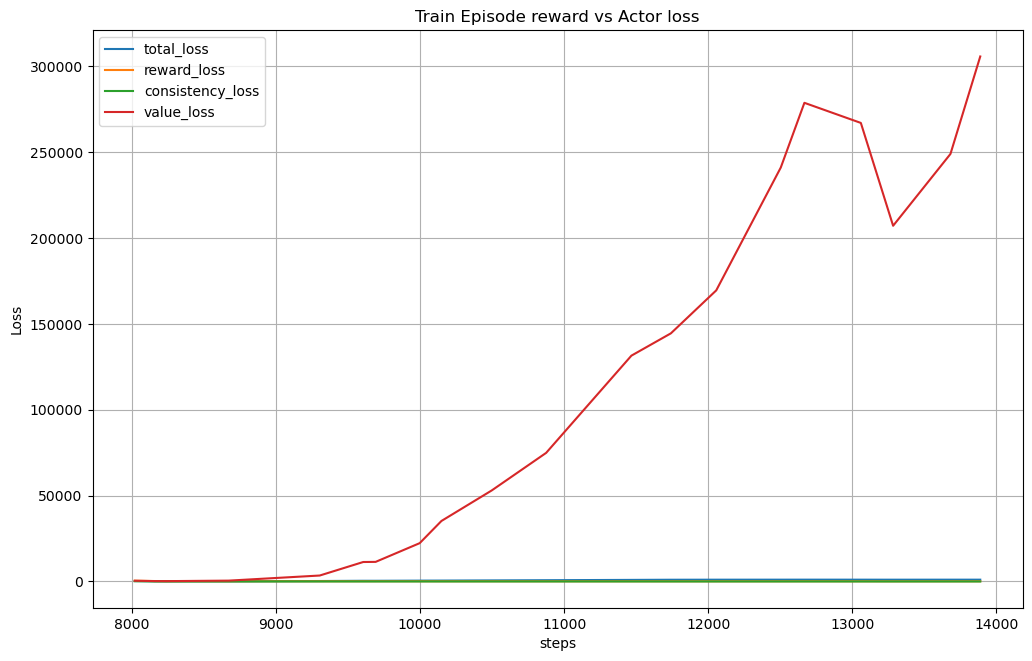

In [ ]:
path = get_latest_plot_data('train.csv')
print(path)
d = from_csv(path)
plot_single(d['step'], 
            [(d['total_loss'],'total_loss'),
            (d['reward_loss'],'reward_loss'),
            (d['consistency_loss']*1000,'consistency_loss'), 
            (d['value_loss']*0,'value_loss'),],
            "Train Episode reward vs Actor loss",
            "steps",
            "Loss")

In [5]:
path = get_latest_plot_data('eval.csv')
print(path)
d = from_csv(path)
plot_single(d['step'], 
            [(d['episode_reward'],'episode_reward')],
            "Eval Reward",
            "steps",
            "Episode Reward")
plot_single(d['step'], 
            [(d['success_percentage'],'success_percentage')],
            "Eval Success Percentage",
            "steps",
            "Success Percentage")

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

def plot_single(x, ys, title, xlabel, ylabel, **kwargs):
    plt.figure(figsize=(12, 7.5))
    for (y,yl) in ys:
        plt.plot(x, y, linestyle='-', label=yl)
    plt.title(title)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [4]:
def get_latest_dir(neg_offset=-1):
    base_path = 'exp_local'
    format_inner = lambda f: join(base_path, f)
    outer_dir = sorted(filter(lambda f: os.path.isdir(format_inner(f)) and f.endswith('_tdmpc'), 
                            os.listdir(base_path)))[-1]
    outer_dir = format_inner(outer_dir)
    format_outer = lambda f: join(outer_dir, f)
    inner_dir = sorted(filter(lambda f: os.path.isdir(format_outer(f)),
                            os.listdir(outer_dir)))[neg_offset]
    return format_outer(inner_dir)

def get_latest_plot_data(csv_file, neg_offset=-1):
    dir = get_latest_dir(neg_offset)
    return join(dir, csv_file)

def get_all_loss_curves(neg_offset=-1):
    dir = get_latest_dir(neg_offset)
    loss_curve_files = sorted(filter(
        lambda f: os.path.isfile(os.path.join(dir, f))
        and f.startswith('loss_curve'),
        os.listdir(dir)))
    loss_curves = [np.load(os.path.join(dir, f)) for f in loss_curve_files]
    return loss_curves

exp_local/2025.03.28_rl/180500/train.csv


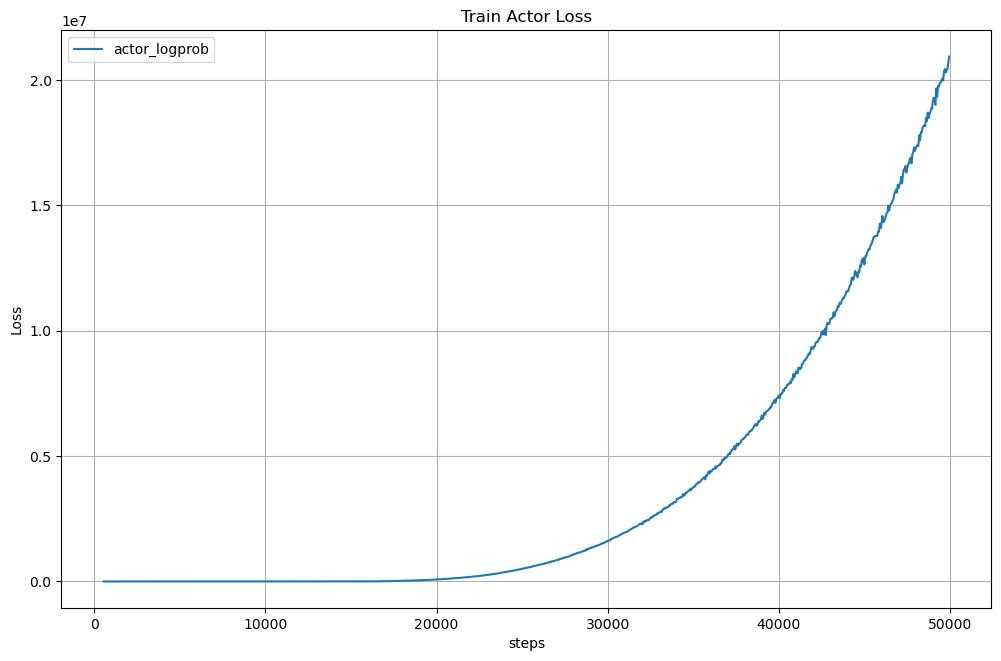

In [7]:
path = get_latest_plot_data('train.csv')
print(path)
d = from_csv(path)
plot_single(d['step'], 
            [(-d['actor_logprob'],'actor_logprob')],
            "Train Actor Loss",
            "steps",
            "Loss")

exp_local/2025.04.25_tdmpc/213454/eval.csv


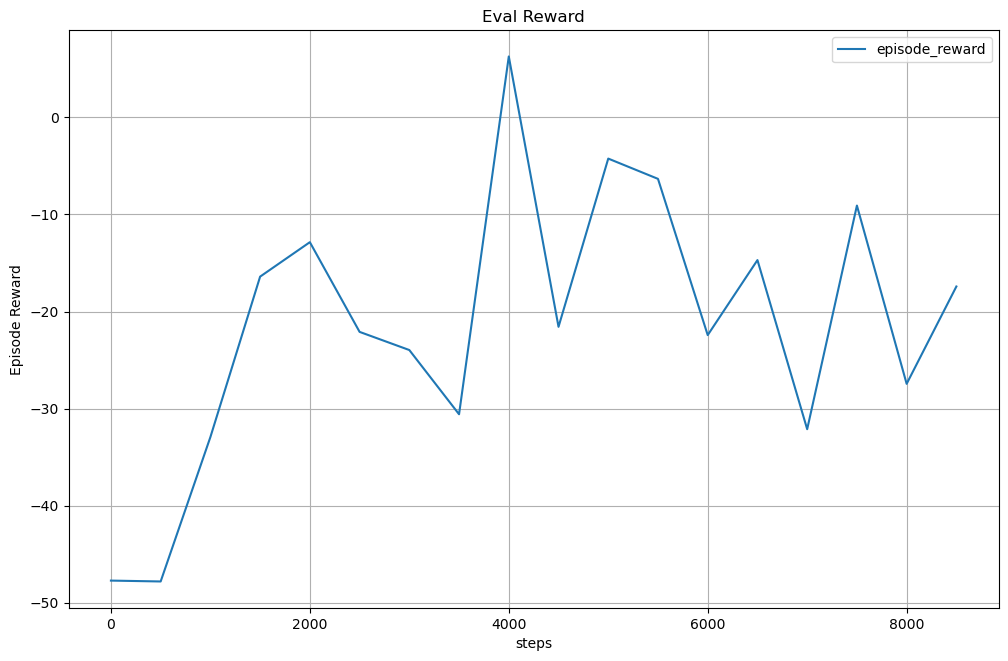

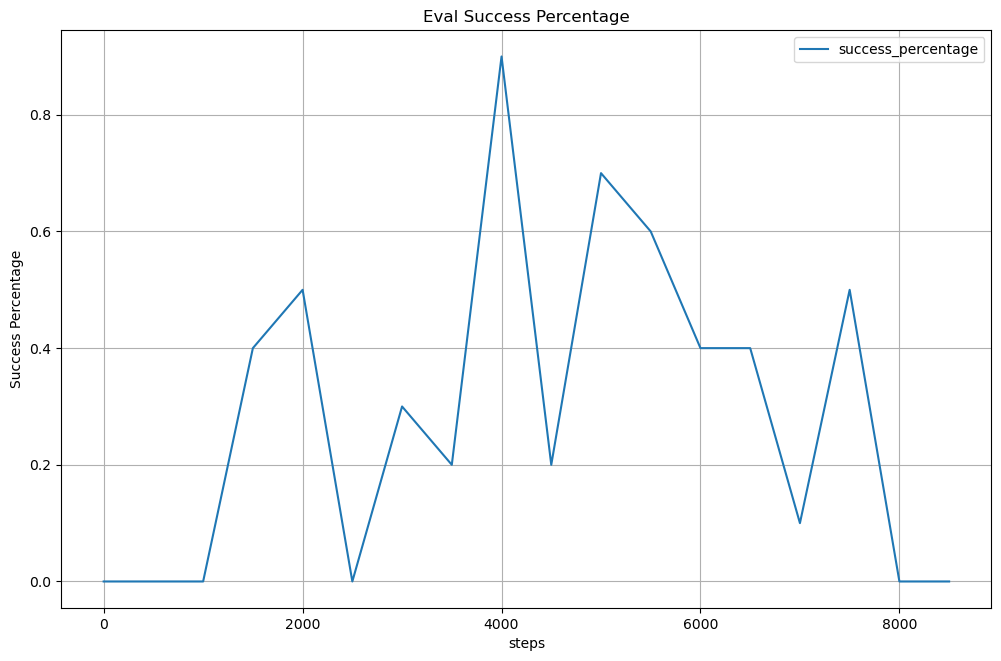

In [18]:
path = get_latest_plot_data('eval.csv')
print(path)
d = from_csv(path)
plot_single(d['step'], 
            [(d['episode_reward'],'episode_reward')],
            "Eval Reward",
            "steps",
            "Episode Reward")
plot_single(d['step'], 
            [(d['success_percentage'],'success_percentage')],
            "Eval Success Percentage",
            "steps",
            "Success Percentage")